# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">5. Level 2 Binary Classification</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546    |

---

### **5. Level 2 Binary Classification Notebook**
**Description:**
This notebook focuses on the **Level 2 Binary Classification model**, which distinguishes between the two most common classes identified in Level 1:
- **2 - NON-COMP**
- **4 - TEMPORARY**

Key steps include:
- Loading the subset of **“Common”** cases from Level 1 predictions.
- **Feature selection:** Tailor feature preprocessing and selection for this binary classification task.
- **Model training:** Train and evaluate a binary classification model to distinguish between the two classes.
- **Evaluation:** Use metrics like accuracy, precision, recall, and F1-score to measure performance.
- **Output:** Save predictions for integration in the final notebook.

This notebook refines the classification of cases within the most common classes, contributing to the pipeline's accuracy.

---


<a id = "toc"></a>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [4.1. Preparing the Data](#section_4_1)  
    * [4.2. Numerical Features](#section_4_2) 
        * [4.2.1. LASSO Regression](#section_4_2_1)
        * [4.2.2. Recursive Feature Elimination - RFE](#section_4_2_2)
        * [4.2.3. Feature Importance - Decision Tree](#section_4_2_3)
        * [4.2.4. Feature Importance - Random Forest](#section_4_2_4)
    * [4.3. Categorical Features](#section_4_3)
        * [4.3.1. $\chi ^2$ Test for Independence](#section_4_3_1)
        * [4.3.2. Mutual Information Criterion (MIC)](#section_4_3_2)
    * [4.4. Final Features](#section_4_4)
* [5. Modelling](#chapter5)
  * [5.1. Logistic Regression](#section_5_1)
  * [5.2. Random Forest Trees](#section_5_2)
  * [5.3. Decision Trees](#section_5_3)
  * [5.4. Gradient Boosting](#section_5_4)
  * [5.5. Summary of Models](#section_5_5)
* [6. Loading the results](#chapter6)


# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>
[Back to ToC](#toc)<br>

In [1]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import pickle
import time

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Wrapper Methods and Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')


#Import from utils the used functions
from utils import plot_importance, cor_heatmap, find_optimal_features_with_rfe, compare_rf_feature_importances
from utils import compare_feature_importances, select_high_score_features_chi2_no_model, select_high_score_features_MIC, metrics


In this topic we will also import the pre-saved feature categories dictionary from Notebook 3, ensuring consistency in feature grouping for feature selection and modeling.

In [2]:
# Load the feature categories dictionary
feature_categories_file = "feature_categories.pkl"
with open(feature_categories_file, "rb") as file:
    feature_categories = pickle.load(file)

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
[Back to ToC](#toc)<br>

Now that we preprocessed the dataset in notebook 3. we will upload those datasets

In [3]:
#Import the datasets
X_train = pd.read_csv("../processed_datasets/X_train_model.csv", index_col="Claim Identifier")
X_val = pd.read_csv("../processed_datasets/X_val_model.csv", index_col="Claim Identifier")
df_test = pd.read_csv("../processed_datasets/df_test_predictions_not4.csv", index_col="Claim Identifier")

Let's open the dataset.

In [4]:
X_train.head(3)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6099734,67,4.0,0.0,1,3,2022,3,1,3,3,...,34856,34897,216798,9648,44601,38469,11544,96343,404174,228492
5796182,30,0.0,0.0,1,3,2021,5,2,7,7,...,34856,13901,68763,6081,88312,15038,11163,96343,404174,228492
6128237,58,0.0,0.0,0,4,2022,3,0,7,7,...,2362,636,17442,11777,13917,6521,14012,80866,404174,228492


In [5]:
X_val.head(3)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5730729,52,1.0,0.0,4,2,2021,1,0,7,7,...,73733,42680,216798,23476,122811,15038,88862.0,96343,404174,88862
6038049,28,0.0,0.0,1,2,2022,5,2,1,1,...,21175,42680,216798,8659,4398,6314,88862.0,45491,404174,88862
5887035,61,0.0,0.0,2,4,2021,3,0,0,0,...,8092,1001,35808,26555,44601,41385,11544.0,80866,404174,228492


We also need to load the test dataset resulted from notebook 4., with the best predictions.

In [6]:
df_test.head(3)

,Age at Injury,IME-4 Count,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,...,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq,Predicted_Class
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,19,0.0,3,4,2022,5,3,3,3,5,...,31684,216798,25490,88312,9326,7246.0,96343,404174,228492,1
6166141,19,0.0,1,4,2022,6,3,0,0,5,...,46587,216798,14632,88312,6322,8907.0,45491,404174,228492,1
6165907,59,0.0,2,4,2022,0,0,7,7,5,...,20637,216798,8659,44601,929,149.0,80866,404174,228492,1


We will also upload the y train and y_val.

In [7]:
# Load the arrays
y_train = np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)
y_val =  np.load("../processed_datasets/y_val_preprocessed.npy", allow_pickle=True)

In [8]:
X_val.shape

(114805, 30)

In [9]:
len(y_val)

114805

Let's remove the column predictions from the df_test saving in a variable y_test

In [10]:
df_test['Predicted_Class'].value_counts()

1    383620
0      4355
Name: Predicted_Class, dtype: int64

In [11]:
y_test = df_test['Predicted_Class']
df_test.drop('Predicted_Class', axis=1, inplace=True)

In [12]:
#Print the y_test values
y_test.unique()

array([1, 0], dtype=int64)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>

[Back to ToC](#toc)<br>

In this notebook, our objective is to distinguish the majority classes from the subset of the dataset where the predicted targets from Notebook 2 were identified as majority classes. Specifically, we will focus on the portion of the dataset with target labels `'2. NON-COMP'` or `'4. TEMPORARY'`. This refined selection allows us to target the classification of majority classes with greater precision.

In [13]:
#Filtering the majority classes
X_train_2_4 = X_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

y_train_2_4 = y_train[(y_train == '2. NON-COMP') | (y_train == '4. TEMPORARY')]

Do the same for validation dataset.

In [14]:
#Filtering the majority classes
X_val_2_4 = X_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

y_val_2_4 = y_val[(y_val == '2. NON-COMP') | (y_val == '4. TEMPORARY')]

Now, we will encode the target.

In [15]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train_2_4)  # Fit and transform on y_train_2_4
y_val_encoded = encoder.transform(y_val_2_4)  # Only transform on y_val_2_4

In [16]:
# Verify that the target is encoded 
print(f'{y_train_encoded}')
print(f'{np.unique(y_train_encoded)}')

[1 0 0 ... 1 0 0]
[0 1]


# 4. Feature Selection <a class="anchor" id="chapter4"></a>

[Back to ToC](#toc)<br>


The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train_2_4` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

In [17]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train_2_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,351667.0,42.432383,13.047048,5.000000,32.0,42.000000,53.0,82.0
IME-4 Count,351667.0,0.649239,1.935825,0.000000,0.0,0.000000,0.0,25.0
Agreement Reached,351667.0,0.058968,0.235565,0.000000,0.0,0.000000,0.0,1.0
Income_Category,351667.0,2.150540,1.152357,0.000000,1.0,2.000000,3.0,4.0
Accident_Quarter,351667.0,2.497058,1.130417,1.000000,1.0,3.000000,4.0,4.0
Accident_Year,351667.0,2020.836482,1.887932,1967.000000,2020.0,2021.000000,2022.0,2023.0
Accident Day,351667.0,2.523461,1.828102,0.000000,1.0,2.000000,4.0,6.0
Age Group,351667.0,1.372241,1.079051,0.000000,0.0,2.000000,2.0,3.0
promptness_category,351667.0,4.471898,2.477463,0.000000,3.0,4.000000,7.0,7.0
promptness_C2_category,351667.0,4.506323,2.487333,0.000000,3.0,4.000000,7.0,7.0


In this section we will use the created dictionary in Notebook 3.

In [18]:
# Print summary
for category, features in feature_categories.items():
    print(f"{category.capitalize()} Features ({len(features)}):")
    print(features, "\n")

Categorical Features (6):
['Income_Category', 'Age Group', 'promptness_category', 'promptness_C2_category', 'promptness_C3_category', 'Industry Risk'] 

Binary Features (5):
['Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_UK'] 

Numerical Features (18):
['Age at Injury', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day', 'Salary_Per_Dependent', 'Carrier_Name_Simplified_freq', 'Zip_Code_Simplified_freq', 'Industry Code_freq', 'County of Injury_freq', 'District Name_freq', 'WCIO Cause of Injury Code_freq', 'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq', 'Carrier Name_freq', 'Body_Part_Category_freq', 'Injury_Nature_Category_freq', 'Carrier Type Merged_freq'] 



## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>

[Back to 4. Feature Selection](#chapter4)<br>


To perform feature selection techniques like Lasso, RFE, and feature importance, the numerical features must first be scaled. Scaling ensures that all features have a consistent range, which is particularly important for methods sensitive to feature magnitude.

In this step, we will use the StandardScaler to standardize the numerical features in the dataset. This scaling process will be applied to a temporary dataset containing only the numerical features, allowing us to focus on selecting the most relevant features effectively. The scaled dataset will then be used as input for feature selection techniques.

In [19]:
# Extract numerical features from the dictionary
numerical_features = feature_categories["numerical"]

# Initialize StandardScaler
num_scaler = StandardScaler()

# Scale numerical features in X_train
X_train_2_4[numerical_features] = num_scaler.fit_transform(X_train_2_4[numerical_features])

X_train_num_scaled= X_train_2_4[numerical_features]

# Scale numerical features in X_val
X_val_2_4[numerical_features] = num_scaler.transform(X_val_2_4[numerical_features])

X_val_num_scaled= X_val_2_4[numerical_features]

**Variance Check After Scaling**

After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [20]:
# Check variance of scaled data
X_train_num_scaled.var()

Age at Injury                      1.000003
IME-4 Count                        1.000003
Accident_Quarter                   1.000003
Accident_Year                      1.000003
Accident Day                       1.000003
Salary_Per_Dependent               1.000003
Carrier_Name_Simplified_freq       1.000003
Zip_Code_Simplified_freq           1.000003
Industry Code_freq                 1.000003
County of Injury_freq              1.000003
District Name_freq                 1.000003
WCIO Cause of Injury Code_freq     1.000003
WCIO Nature of Injury Code_freq    1.000003
WCIO Part Of Body Code_freq        1.000003
Carrier Name_freq                  1.000003
Body_Part_Category_freq            1.000003
Injury_Nature_Category_freq        1.000003
Carrier Type Merged_freq           1.000003
dtype: float64

The output shows the variance of each numerical column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>
 [Back to 4. Feature Selection](#chapter4)<br>
 

### 4.2.1. LASSO Regression <a class="anchor" id="sub_section_4_2_1"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [21]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Accident_Year                     -0.024000
District Name_freq                -0.015656
Industry Code_freq                -0.010584
Carrier_Name_Simplified_freq      -0.007093
Body_Part_Category_freq           -0.005171
Zip_Code_Simplified_freq          -0.002716
Carrier Type Merged_freq          -0.002244
Accident Day                      -0.000860
Accident_Quarter                  -0.000797
Salary_Per_Dependent              -0.000653
WCIO Nature of Injury Code_freq    0.007968
Injury_Nature_Category_freq        0.010388
County of Injury_freq              0.012753
Age at Injury                      0.019824
WCIO Cause of Injury Code_freq     0.021714
WCIO Part Of Body Code_freq        0.034006
Carrier Name_freq                  0.048705
IME-4 Count                        0.201084
dtype: float64

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

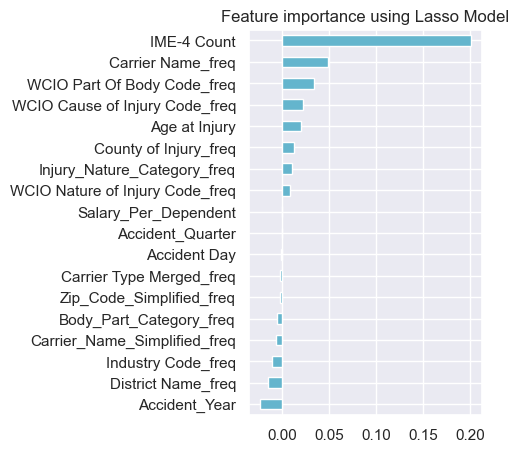

In [22]:
plot_importance(coef,'Lasso')

Let's consider all the values above 0.015.

 ### 4.2.2. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_2_2"></a>

  [Back to 4.2. Numerical Features](#section_4_2)<br>
 

RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [23]:
len(numerical_features)

18

In [24]:
# RFE using Logistic Regression
model = LogisticRegression()

#Use the function defined in utils.py
best_features, best_score, scores = find_optimal_features_with_rfe(
    model, 
    X_train_num_scaled, 
    y_train_encoded, 
    X_val_num_scaled, 
    y_val_encoded,
    max_features=19
)

Optimum number of features: 4
F1 Macro Score with 4 features: 0.756563



The loop evaluates models with 1 to 18 features, tracking the score for each.

The output indicates that 4 features yielded the highest validation f1_score score of 0.756563.

**Applying RFE with the Optimal Number of Features**

Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [25]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)

In [26]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [27]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age at Injury                      False
IME-4 Count                         True
Accident_Quarter                   False
Accident_Year                       True
Accident Day                       False
Salary_Per_Dependent               False
Carrier_Name_Simplified_freq       False
Zip_Code_Simplified_freq           False
Industry Code_freq                 False
County of Injury_freq              False
District Name_freq                 False
WCIO Cause of Injury Code_freq     False
WCIO Nature of Injury Code_freq    False
WCIO Part Of Body Code_freq         True
Carrier Name_freq                   True
Body_Part_Category_freq            False
Injury_Nature_Category_freq        False
Carrier Type Merged_freq           False
dtype: bool

### 4.2.3. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_2_3"></a>
 [Back to 4.2. Numerical Features](#section_4_2)<br>



In [28]:
from utils import compare_feature_importances

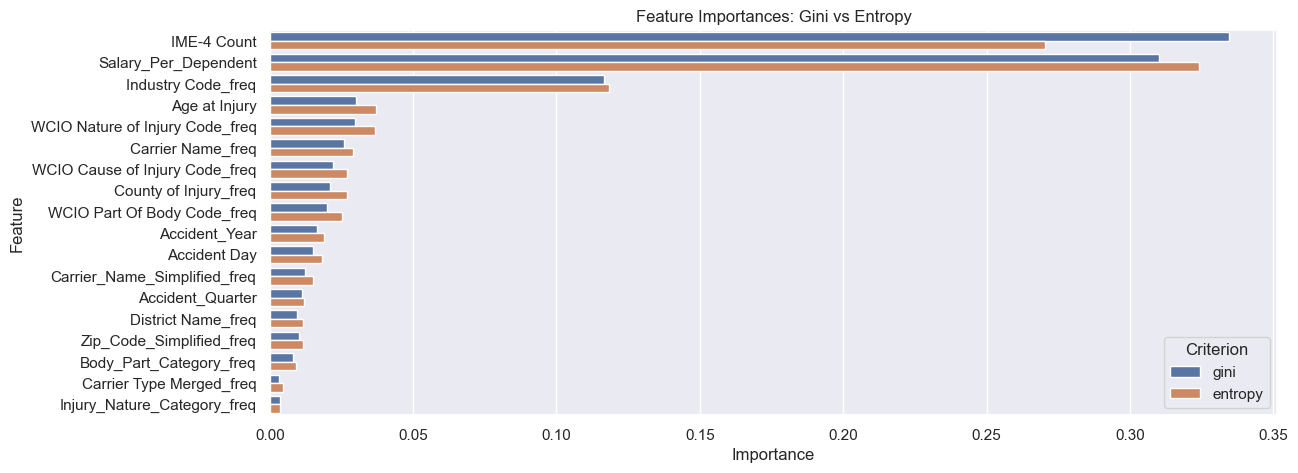

       gini   entropy               col
0  0.030170  0.037069     Age at Injury
1  0.334630  0.270409       IME-4 Count
2  0.011121  0.011979  Accident_Quarter
3  0.016596  0.019025     Accident_Year
4  0.015177  0.018127      Accident Day


In [29]:
# Call the function with your training data
zippy = compare_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(zippy.head())

### 4.2.4. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_2_4"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


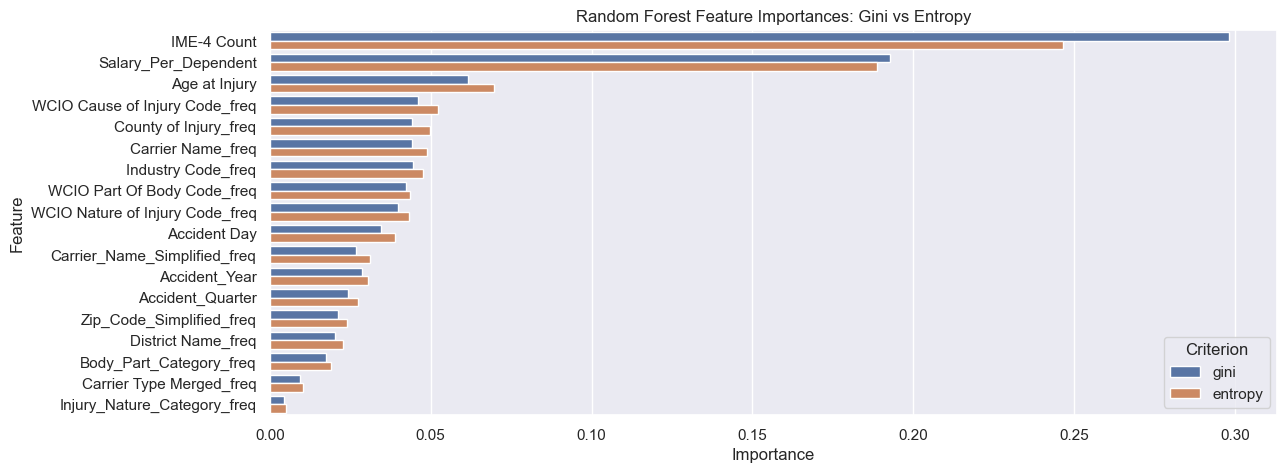

       gini   entropy               col
0  0.061458  0.069652     Age at Injury
1  0.298197  0.246534       IME-4 Count
2  0.024217  0.027513  Accident_Quarter
3  0.028703  0.030494     Accident_Year
4  0.034631  0.039057      Accident Day


In [30]:
# Call the function with your training data
importances = compare_rf_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(importances.head())

## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
[Back to 4. Feature Selection](#chapter4)<br>

Chi-squared and MIC for the categorical ones.

In [31]:
X_train_mic_chi2 = X_train_2_4[feature_categories['categorical'] + feature_categories['binary']]

In [32]:
X_train_mic_chi2.shape

(351667, 11)

In [33]:
X_train_mic_chi2.columns

Index(['Income_Category', 'Age Group', 'promptness_category',
       'promptness_C2_category', 'promptness_C3_category', 'Industry Risk',
       'Gender_M', 'Gender_U', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_UK'],
      dtype='object')

 ### 4.3.1. $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_3_1"></a>

[Back to 4.3. Categorical Features](#section_4_3)<br>


The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. 

In [34]:
from utils import select_high_score_features_chi2_no_model

In [35]:
# Example usage
high_score_features_chi2, scores = select_high_score_features_chi2_no_model(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6
)

Top 6 features based on Chi-square scores: ['Income_Category', 'promptness_C3_category', 'Age Group', 'Industry Risk', 'Gender_M', 'promptness_C2_category']
Corresponding Chi-square scores: [18070.663019890526, 11820.939622418879, 1903.049535399994, 1528.827444958079, 739.4178618093894, 508.5256175773334]


In [36]:
high_score_features_chi2

['Income_Category',
 'promptness_C3_category',
 'Age Group',
 'Industry Risk',
 'Gender_M',
 'promptness_C2_category']

 ### 4.3.2. Mutual Information Criterion (MIC) <a class="anchor" id="sub_section_4_3_2"></a>

 [Back to 4.3. Categorical Features](#section_4_3)<br>
 

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [37]:
from utils import select_high_score_features_MIC

In [38]:
# Example usage
high_score_features_MIC, scores_MIC = select_high_score_features_MIC(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6, 
    random_state=42)

Top 6 features based on MIC scores: ['promptness_C3_category', 'Income_Category', 'Industry Risk', 'Gender_M', 'Age Group', 'promptness_C2_category']
Corresponding MIC scores: [0.11897397145798894, 0.0981253392996877, 0.04038079625971336, 0.03587573157240098, 0.017629743040151302, 0.01745924884422667]


In [39]:
high_score_features_MIC

['promptness_C3_category',
 'Income_Category',
 'Industry Risk',
 'Gender_M',
 'Age Group',
 'promptness_C2_category']

**Intersection of Selected Features by Chi-squared and MIC** <br>
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [40]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(high_score_features_chi2).intersection(set(high_score_features_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Industry Risk',
 'promptness_C3_category',
 'Age Group',
 'Gender_M',
 'promptness_C2_category',
 'Income_Category']

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>
[Back to 4. Feature Selection](#chapter4)<br>

The following table evaluates all numerical features using multiple feature selection techniques: Spearman Correlation, LASSO Regression, RFE, Decision Tree, and Random Forest. Based on these combined insights, a final decision is provided in the "What to do?" column.


| **Predictor**                 | **LASSO**         | **RFE**            | **Decision Tree Importance**   | **Random Forest Importance**  | **What to do?**               |
|-------------------------------|-------------------|--------------------|--------------------------------|--------------------------------|--------------------------------|
| Carrier Type Merged_freq      | Discard              | Discard               | Low                            | Low                            | Discard                       |
| Carrier_Name_Simplified_freq  | Discard              | Discard               | Low                            | Low                            | Discard                       |
| Injury_Nature_Category_freq    | Discard           | Discard               | Low                            | Low                            | Discard                       |
| District Name_freq            | Discard           | Discard               | Low                            | Low                            | Discard                       |
| Accident_Quarter              | Discard           | Discard               | Low                            | Low                            | Discard                       |
| Accident_Year                 |Keep           | Keep               | Low                            | Low                            | Consider include in the model                       |
| Zip_Code_Simplified_freq      |Discard           | Discard               | Low                            | Low                            | Discard                       |
| WCIO Cause of Injury Code_freq| Keep           | Discard               | Low                           | Low                           | Discard                        |
| Accident Day                  | Discard           | Discard            | Low                           | Low                            | Discard                       |
| Industry Code_freq            | Discard           | Discard               | Keep                           | Keep                            | Consider include in the model                      |
| Body_Part_Category_freq       | Discard           | Discard               | Low                            | Low                            | Discard                       |
| WCIO Part Of Body Code_freq |  Keep           | Keep               | Low                            | Low                            | Consider include in the model                       |
| WCIO Nature of Injury Code_freq| Discard           | Discard               | Low                            | Low                            | Discard                       |
| Carrier Name_freq             | Keep              | Keep               | Low                           | Low                           | Consider include in the model                       |
| Salary_Per_Dependent          | Discard              | Discard               | Keep                           | Keep                           | Consider include in the model                       |
| County of Injury_freq         | Discard              | Discard               | Low                           | Low                           | Discard                       |
| Age at Injury                 | Keep              | Discard               | Keep                           | Low                           | Include                       |
| IME-4 Count                   | Keep              | Keep               | Keep                           | Keep                           | Include                       |

### **Categorical Feature Selection Results**

The following table summarizes the decisions for each categorical feature based on **Mutual Information (MIC)** and **Chi-Squared** (X²) results. The retained features will be used in subsequent modeling to enhance predictive performance.

| **Feature**              | **X² Results**          | **MIC Results**         | **Decision**               |
|---------------------------|-------------------------|-------------------------|----------------------------|
| promptness_C2_category | Keep                  | -                  | Consider include in model               |
| promptness_category    | -                     | Keep                       | Consider include in model                |
| promptness_C3_category | Keep                       | Keep                  | Include                |
| Age Group              | Keep                  | Keep                  | Include                |
| Income_Category        | Keep                  | Keep                  | Include                |
| Industry Risk         | Keep                   | Keep                  | Include            |
| Gender_M               | Keep                  | Keep                  | Include                |
| Gender_U               | -                       | -                       | Exclude          |
| Medical Fee Region_II  | -                       | -                       | Exclude               |
| Medical Fee Region_III | -                       | -                       | Exclude               |
| Medical Fee Region_UK  | -                       | -                       | Exclude                |


In [41]:
numerical_features

['Age at Injury',
 'IME-4 Count',
 'Accident_Quarter',
 'Accident_Year',
 'Accident Day',
 'Salary_Per_Dependent',
 'Carrier_Name_Simplified_freq',
 'Zip_Code_Simplified_freq',
 'Industry Code_freq',
 'County of Injury_freq',
 'District Name_freq',
 'WCIO Cause of Injury Code_freq',
 'WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'Carrier Name_freq',
 'Body_Part_Category_freq',
 'Injury_Nature_Category_freq',
 'Carrier Type Merged_freq']

In [42]:
final_features = [
    # Categorical features selected through MIC and chi2
    'promptness_C3_category','Industry Risk',
    'Income_Category', 'Age Group', 'Gender_M',
    # Important numerical features
    'Age at Injury', 'IME-4 Count']

final_features_consider = [
    # Categorical features selected through MIC and chi2
    'promptness_C3_category','Industry Risk',
    'Income_Category', 'Age Group', 'Gender_M',
    # Important numerical features
    'Accident_Year', 'WCIO Part Of Body Code_freq','Carrier Name_freq',
    'Salary_Per_Dependent', 'Age at Injury', 'IME-4 Count', 'Industry Code_freq']


# Extracting the final features from the processed datasets
X_train_final = X_train_2_4[final_features]
X_val_final = X_val_2_4[final_features]
X_test_final = df_test[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

# Extracting the final features from the processed datasets
X_train_final_consider = X_train_2_4[final_features_consider]
X_val_final_consider = X_val_2_4[final_features_consider]
X_test_final_consider = df_test[final_features_consider]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final_consider.shape}")
print(f"X_val_final shape: {X_val_final_consider.shape}")
print(f"X_test_final shape: {X_test_final_consider.shape}")

X_train_final shape: (351667, 7)
X_val_final shape: (87918, 7)
X_test_final shape: (387975, 7)
X_train_final shape: (351667, 12)
X_val_final shape: (87918, 12)
X_test_final shape: (387975, 12)


In [43]:
len(y_train_encoded)

351667

In [44]:
len(y_val_encoded)

87918

# 5. Modeling <a class="anchor" id="chapter5"></a>

[Back to ToC](#toc)<br>

For this binary classification task, we’ll use logistic regression as a simple and interpretable baseline. To capture non-linear patterns, we’ll include decision trees and random forests, which are robust and versatile. Additionally, we’ll apply gradient boosting methods like XGBoost or LightGBM for their strong performance on complex datasets. This mix of models balances simplicity and power for effective classification.

## 5.1. Logistic Regression </b> <a class="anchor" id="section_5_1"></a>

[Back to 5. Modeling ](#chapter5)<br>

Logistic Regression is a simple and interpretable model that is effective for binary classification when the relationship between features and the target is linear.

**Standard Scaler**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.80      0.97      0.88    232862
4. TEMPORARY       0.90      0.53      0.67    118805

    accuracy                           0.82    351667
   macro avg       0.85      0.75      0.77    351667
weighted avg       0.83      0.82      0.81    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

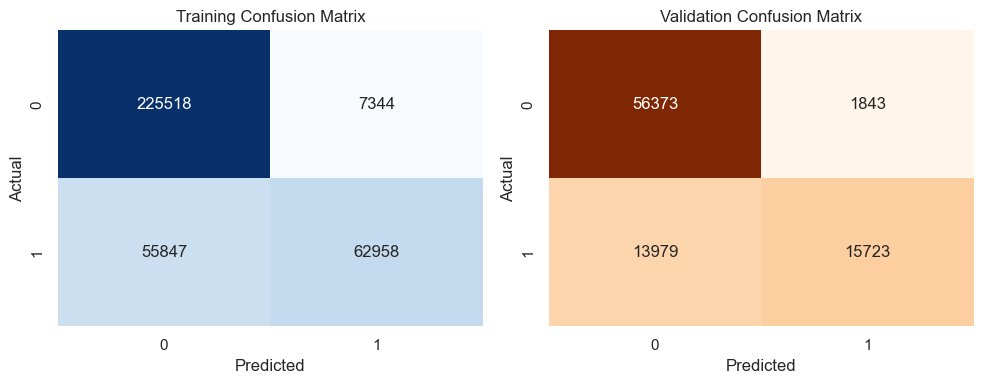

Time taken to run the cell: 51.64 seconds


In [45]:
# Record the start time
start_time = time.time()

# Scale features
scaler_log = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler_log.fit_transform(X_train_final)

# Transform validation and test data using the same scaler
X_val_scaled = scaler_log.transform(X_val_final)
X_test_scaled = scaler_log.transform(X_test_final)

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_scaled, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_scaled)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_scaled)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

**Robust Scaler**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.80      0.97      0.88    232862
4. TEMPORARY       0.90      0.53      0.67    118805

    accuracy                           0.82    351667
   macro avg       0.85      0.75      0.77    351667
weighted avg       0.83      0.82      0.81    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

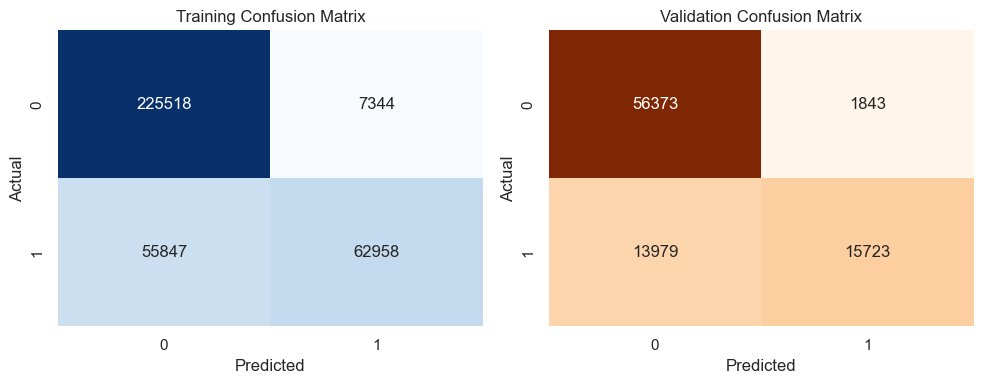

Time taken to run the cell: 53.14 seconds


In [46]:
#import the robust scaler
from sklearn.preprocessing import RobustScaler

# Record the start time
start_time = time.time()

# Scale features
scaler_log = RobustScaler()

# Fit on training data and transform
X_train_scaled = scaler_log.fit_transform(X_train_final)

# Transform validation and test data using the same scaler
X_val_scaled = scaler_log.transform(X_val_final)
X_test_scaled = scaler_log.transform(X_test_final)

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_scaled, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_scaled)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_scaled)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

**Min Max Scaler**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.80      0.97      0.88    232862
4. TEMPORARY       0.90      0.53      0.66    118805

    accuracy                           0.82    351667
   macro avg       0.85      0.75      0.77    351667
weighted avg       0.83      0.82      0.81    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

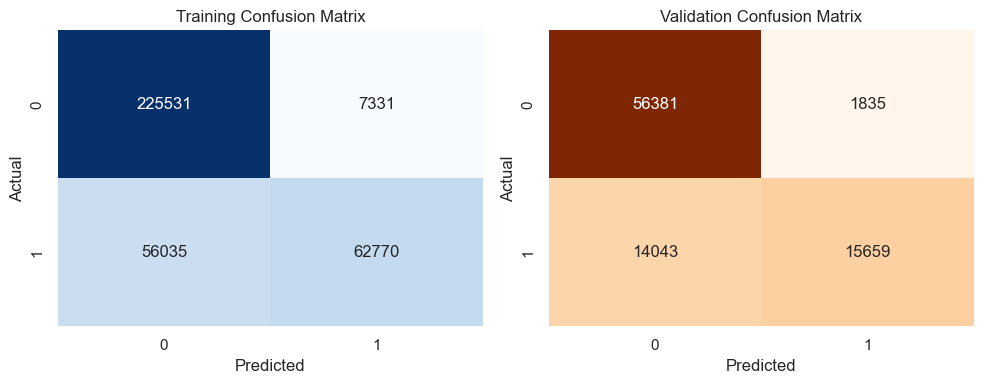

Time taken to run the cell: 52.78 seconds


In [47]:
#import the robust scaler
from sklearn.preprocessing import MinMaxScaler

# Record the start time
start_time = time.time()

# Scale features
scaler_log = MinMaxScaler()

# Fit on training data and transform
X_train_scaled = scaler_log.fit_transform(X_train_final)

# Transform validation and test data using the same scaler
X_val_scaled = scaler_log.transform(X_val_final)
X_test_scaled = scaler_log.transform(X_test_final)

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_scaled, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_scaled)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_scaled)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

Despite having the same f1_score the StandardScaler took less time to run, so we will use this as our scaler. <br>
Let's also try with the features to consider

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.83      0.97      0.89    232862
4. TEMPORARY       0.91      0.61      0.73    118805

    accuracy                           0.85    351667
   macro avg       0.87      0.79      0.81    351667
weighted avg       0.86      0.85      0.84    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

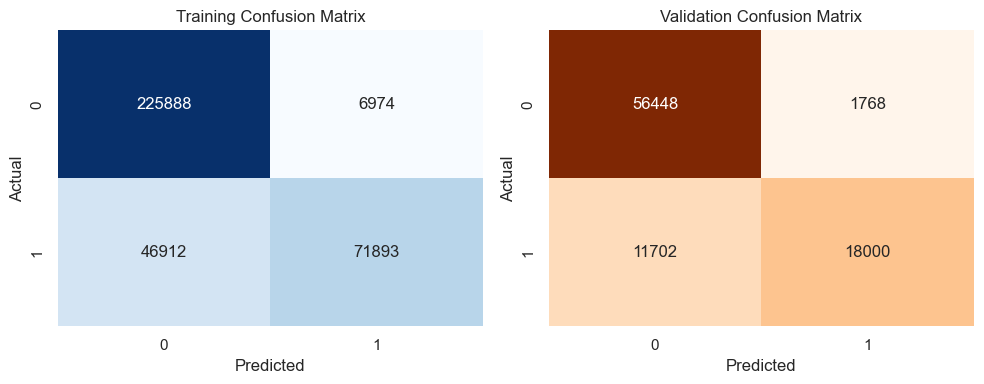

Time taken to run the cell: 82.68 seconds


In [48]:
# Record the start time
start_time = time.time()

# Scale features
scaler_log = StandardScaler()

# Fit on training data and transform
X_train_scaled_consider = scaler_log.fit_transform(X_train_final_consider)

# Transform validation and test data using the same scaler
X_val_scaled_consider = scaler_log.transform(X_val_final_consider)
X_test_scaled_consider = scaler_log.transform(X_test_final_consider)

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the train data
lr_model.fit(X_train_scaled_consider, y_train_2_4)

# Predict the model for the train data
y_pred_lr_train = lr_model.predict(X_train_scaled_consider)

# Predict the model for the validation data
y_pred_lr = lr_model.predict(X_val_scaled_consider)

#Print the classification report
metrics(y_train_2_4, y_pred_lr_train, y_val_2_4, y_pred_lr)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.2. Random Forest Trees</b> <a class="anchor" id="section_5_2"></a>
[Back to 5. Modelling ](#chapter5)<br>

Random Forest is an ensemble learning method that combines multiple decision trees trained on random subsets of data and features to improve accuracy and reduce overfitting. It aggregates their predictions using majority voting for classification or averaging for regression.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.87      0.97      0.91    232862
4. TEMPORARY       0.92      0.70      0.80    118805

    accuracy                           0.88    351667
   macro avg       0.89      0.84      0.86    351667
weighted avg       0.88      0.88      0.87    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

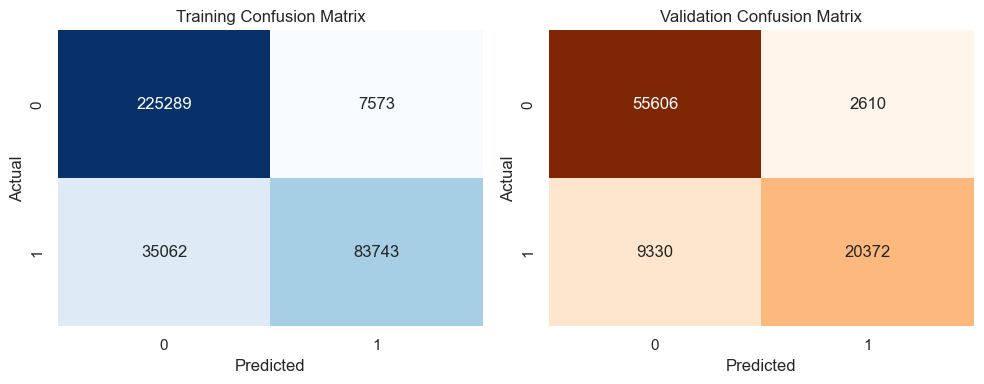

Time taken to run the cell: 117.46 seconds


In [49]:
# Record the start time
start_time = time.time()

#Initialize the model
rf_model = RandomForestClassifier(random_state=42)

#Fit the model to the train data
rf_model.fit(X_train_scaled, y_train_2_4)

#Predict the model for the train data
y_pred_rf_train = rf_model.predict(X_train_scaled)

#Predict the model for the validation data
y_pred_rf = rf_model.predict(X_val_scaled)

#Print the classification report
metrics(y_train_2_4, y_pred_rf_train, y_val_2_4, y_pred_rf)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       0.90      0.96      0.93    232862
4. TEMPORARY       0.92      0.80      0.85    118805

    accuracy                           0.91    351667
   macro avg       0.91      0.88      0.89    351667
weighted avg       0.91      0.91      0.91    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

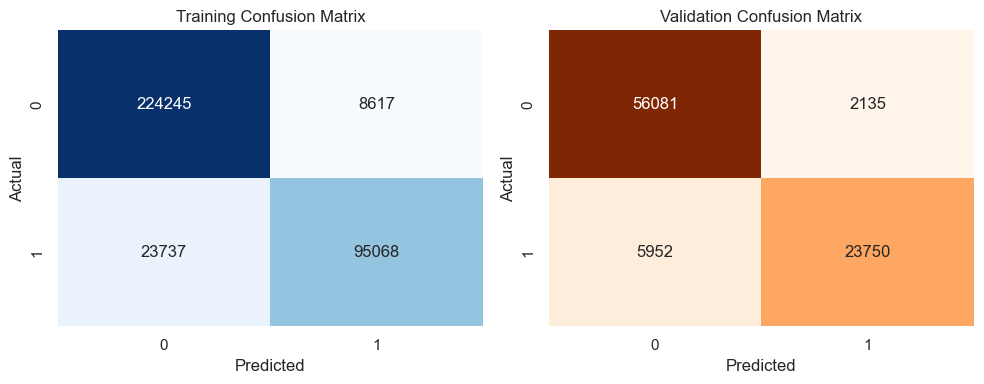

Time taken to run the cell: 195.12 seconds


In [50]:
# Record the start time
start_time = time.time()

#Initialize the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced',max_depth=10, min_samples_split=5, min_samples_leaf=3)

#Fit the model to the train data
rf_model.fit(X_train_scaled_consider, y_train_2_4)

#Predict the model for the train data
y_pred_rf_train = rf_model.predict(X_train_scaled_consider)

#Predict the model for the validation data
y_pred_rf = rf_model.predict(X_val_scaled_consider)

#Print the classification report
metrics(y_train_2_4, y_pred_rf_train, y_val_2_4, y_pred_rf)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.3. Decision Trees</b> <a class="anchor" id="section_5_3"></a>
[Back to 5. Modeling ](#chapter5)<br>


Decision Trees are versatile models that can capture non-linear patterns by splitting data based on feature values.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 2. NON-COMP       1.00      1.00      1.00    232862
4. TEMPORARY       1.00      1.00      1.00    118805

    accuracy                           1.00    351667
   macro avg       1.00      1.00      1.00    351667
weighted avg       1.00      1.00      1.00    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

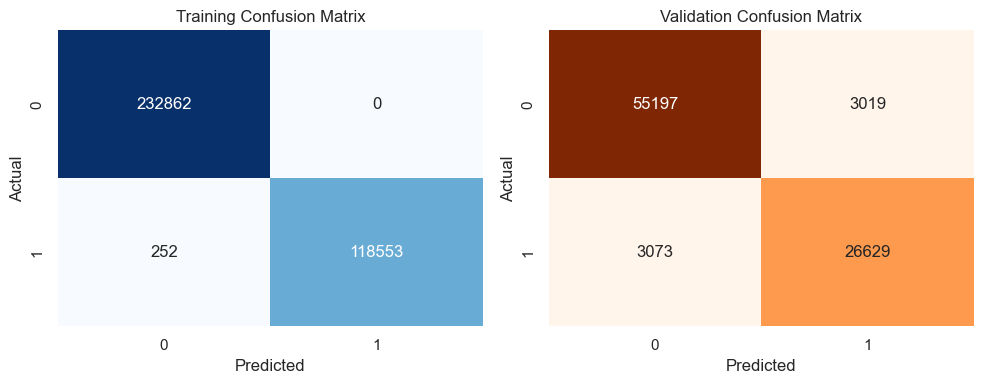

Time taken to run the cell: 95.17 seconds


In [51]:
# Record the start time
start_time = time.time()

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the train data
dt_model.fit(X_train_scaled_consider, y_train_2_4)

# Predict the model for the train data
y_pred_dt_train = dt_model.predict(X_train_scaled_consider)

# Predict the model for the validation data
y_pred_dt = dt_model.predict(X_val_scaled_consider)

#Print the metric report
metrics(y_train_2_4, y_pred_dt_train, y_val_2_4, y_pred_dt)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


## 5.4. Gradient Boosting </b> <a class="anchor" id="section_5_4"></a>
[Back to 5. Modeling ](#chapter5)<br>


Gradient Boosting models (e.g., XGBoost, LightGBM) are powerful ensemble methods that iteratively improve performance by minimizing errors. <br>

**XGBClassifier**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    232862
           1       0.97      0.92      0.94    118805

    accuracy                           0.96    351667
   macro avg       0.97      0.95      0.96    351667
weighted avg       0.96      0.96      0.96    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

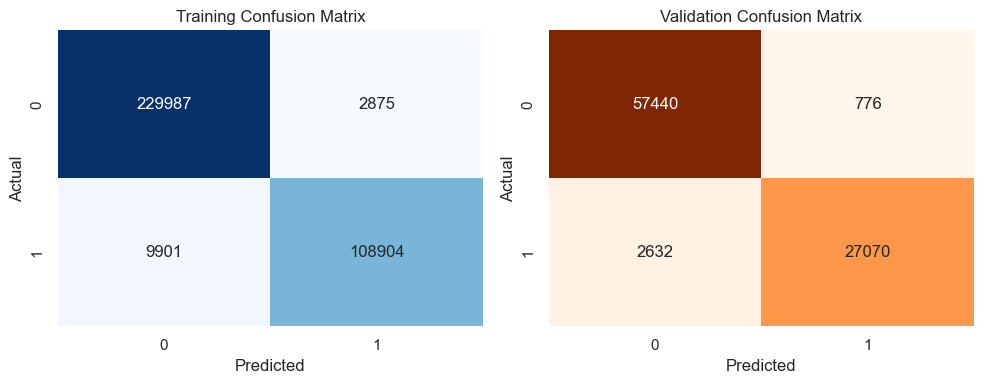

Time taken to run the cell: 7.81 seconds


In [52]:
# Record the start time
start_time = time.time()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_2_4_encoded = label_encoder.fit_transform(y_train_2_4)
y_val_2_4_encoded = label_encoder.transform(y_val_2_4)

# Initialize the model
gb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the train data
gb_model.fit(X_train_scaled_consider, y_train_2_4_encoded)

# Predict the model for the train data
y_pred_gb_train = gb_model.predict(X_train_scaled_consider)

# Predict the model for the validation data
y_pred_gb = gb_model.predict(X_val_scaled_consider)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_gb_train, y_val_2_4_encoded, y_pred_gb)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


**CatBoost (CatBoostClassifier)** <br>
CatBoost is a gradient boosting framework designed to natively support categorical features. It is efficient, easy to implement, and often performs well on tabular data.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    232862
           1       0.98      0.93      0.96    118805

    accuracy                           0.97    351667
   macro avg       0.97      0.96      0.97    351667
weighted avg       0.97      0.97      0.97    351667

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

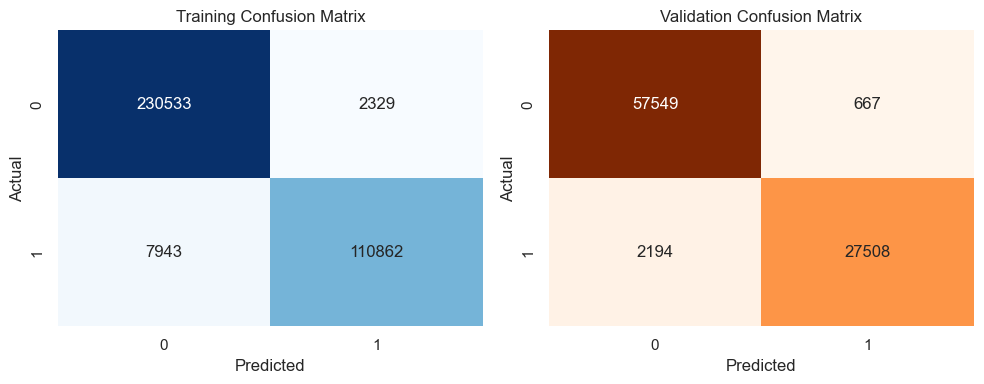

Time taken to run the cell: 101.40 seconds


In [55]:
# Record the start time
start_time = time.time()

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs

# Fit the model to the training data
catboost_model.fit(X_train_scaled_consider, y_train_2_4_encoded)

# Predict the model for the training data
y_pred_catboost_train = catboost_model.predict(X_train_scaled_consider)

# Predict the model for the validation data
y_pred_catboost = catboost_model.predict(X_val_scaled_consider)

# Print the classification report
metrics(y_train_2_4_encoded, y_pred_catboost_train, y_val_2_4_encoded, y_pred_catboost)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

## 5.5. Summary of Models </b> <a class="anchor" id="section_5_5"></a>

[Back to 5. Modelling ](#chapter5)<br>



We focused on a select set of models for binary classification as the initial results provided promising performance metrics. Below is the performance table, including F1 scores for training and validation datasets, along with the time taken for each model to run.

We evaluated several models for binary classification, focusing on their F1 scores for training and validation datasets, as well as the time required for training. Below is the performance summary:

| **Model**                     | **F1 Score (Train)** | **F1 Score (Validation)** | **Time (seconds)** |
|-------------------------------|----------------------|---------------------------|---------------------|
| Logistic Regression (Standard) | 0.77                | 0.77                      | 54.40              |
| Logistic Regression (Robust)   | 0.77                | 0.77                      | 59.15              |
| Logistic Regression (MinMax)   | 0.77                | 0.77                      | 56.95              |
| Logistic Regression w/More Features (Standard) | 0.81 | 0.81 | 52.42              |
| Random Forest (Standard)       | 0.86                | 0.84                      | 140.79             |
| Random Forest w/More Features (Standard) | 0.81 | 0.81 | 141.22             |
| Decision Tree (Standard)       | 1.00                | 0.92                      | 65.35              |
| XGBoost (Standard)             | 0.96                | 0.96                      | 8.23               |
| CatBoost (Standard)            | 0.97                | 0.86                      | 123.91             |

1. **Logistic Regression**: 
   - Simple and computationally efficient, but its F1 scores (0.77 for both train and validation) were lower compared to other models, even when different scalers were applied. Including additional features slightly improved its performance (F1 score of 0.81 for both train and validation).

2. **Random Forest**:
   - Showed strong training performance (F1 score of 0.86) but displayed mild overfitting, as validation performance dropped to 0.84. Including more features reduced overfitting but did not improve overall scores significantly.

3. **Decision Tree**:
   - Achieved perfect training performance (F1 score of 1.00), indicating overfitting. Validation performance was better (F1 score of 0.92), but its tendency to overfit makes it less robust compared to other models.

4. **XGBoost**:
   - Delivered consistently high F1 scores (0.96 for both train and validation) while being the fastest model (8.23 seconds). Its balance of robustness and efficiency makes it a standout option.

5. **CatBoost**:
   - Showed good overall performance (F1 score of 0.85 for both train and validation), but required significantly more time to run (123.91 seconds) compared to XGBoost.

XGBoost emerged as the most robust and efficient model, achieving high F1 scores for both training and validation datasets with minimal computation time. Its strong generalization performance makes it the optimal choice for application on the test set.


# 6. Loading the Results <a class="anchor" id="chapter6"></a>
[Back to ToC](#toc)<br>

For this evaluation, we will focus on the majority class (y_test == 0) while retaining the original output labels (using inverse label encoding). Additionally, we will count instances of NaN values for the minority classes to provide a comprehensive view of the test dataset distribution.

In [57]:
# Convert X_test_scaled from a NumPy array to a pandas DataFrame
X_test_scaled_consider = pd.DataFrame(
    X_test_scaled_consider, 
    columns=df_test[final_features_consider].columns,  # Use the same column names as the original test dataset
    index=df_test[final_features_consider].index       # Preserve the index from the original test dataset
)
X_test_scaled_consider.head()

,promptness_C3_category,Industry Risk,Income_Category,Age Group,Gender_M,Accident_Year,WCIO Part Of Body Code_freq,Carrier Name_freq,Salary_Per_Dependent,Age at Injury,IME-4 Count,Industry Code_freq
Claim Identifier,,,,,,,,,,,,
6165911,0.364369,-1.714263,0.737151,1.508511,0.868983,2022.0,9326.0,7246.0,568.500000,19.0,-1.996253e-17,29868.0
6166141,0.364369,0.707190,-0.998425,1.508511,-1.150770,2022.0,6322.0,8907.0,402.000000,19.0,-1.996253e-17,14481.0
6165907,0.364369,0.707190,-0.130637,-1.271713,-1.150770,2022.0,929.0,149.0,934.000000,59.0,-1.996253e-17,16943.0
6166047,0.364369,-1.714263,0.737151,0.581770,-1.150770,2022.0,38469.0,11544.0,162.428571,42.0,-1.996253e-17,29868.0
6166102,0.364369,-0.503537,0.737151,1.508511,0.868983,2022.0,9984.0,10237.0,203.666667,25.0,-1.996253e-17,296.0


In [61]:
# Filter the test data to include only instances where the actual label (y_test) is 1
X_test_filtered = X_test_scaled_consider.loc[y_test[y_test == 1].index]

# Apply the gradient boosting model to predict the filtered test data
y_pred_test_filtered = gb_model.predict(X_test_filtered)

# Decode the predictions back to their original class labels
# Reuse the LabelEncoder that was already fitted on the training data
label_encoder = LabelEncoder()
label_encoder.fit(y_train_2_4)  # Ensures the mapping matches the training set
y_pred_test_original_filtered = label_encoder.inverse_transform(y_pred_test_filtered)

# Integrate the predictions into the original test dataset
X_test_final.loc[y_test[y_test == 1].index, 'Pred_notebook_5'] = y_pred_test_original_filtered

# Count the frequency of each predicted class in the filtered test set
class_counts_filtered = pd.Series(y_pred_test_original_filtered).value_counts()

# Output the results
print("Predicted Class Counts (Original Labels) for y_test == 1:")
print(class_counts_filtered)

Predicted Class Counts (Original Labels) for y_test == 1:
4. TEMPORARY    258328
2. NON-COMP     125292
dtype: int64


In [62]:
# Ensure the index alignment before assigning predictions
df_test['Pred_notebook_5'] = np.nan  # Initialize with NaN
df_test.loc[X_test_final.index, 'Pred_notebook_5'] = X_test_final['Pred_notebook_5']

# Save the updated DataFrame to a file
df_test.to_csv('../processed_datasets/df_test_predictions_not5.csv', index=True)
print("Predictions saved successfully to 'df_test_predictions_not5.csv'.")

Predictions saved successfully to 'df_test_predictions_not5.csv'.
